In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.utils import load_img
import pathlib
from keras.applications.vgg16 import  preprocess_input,VGG16
from keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications.inception_v3 import preprocess_input,InceptionV3

In [12]:
%cd /content/drive/MyDrive/kaggle/


/content/drive/MyDrive/kaggle


In [13]:

!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign

 98% 319M/325M [00:05<00:00, 58.9MB/s]
100% 325M/325M [00:06<00:00, 55.7MB/s]


In [14]:
%ls

data/                           seg_pred/   skin-cancer-malignant-vs-benign.zip
intel-image-classification.zip  seg_test/   test/
kaggle.json                     seg_train/  train/


In [15]:
!kaggle datasets download -d fanconic/skin-cancer-malignant-vs-benign --unzip --force

 99% 322M/325M [00:08<00:00, 42.2MB/s]
100% 325M/325M [00:09<00:00, 37.4MB/s]


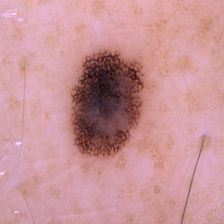

In [16]:
#skin Cancer image
image=load_img('/content/drive/MyDrive/kaggle/data/train/benign/100.jpg')
image

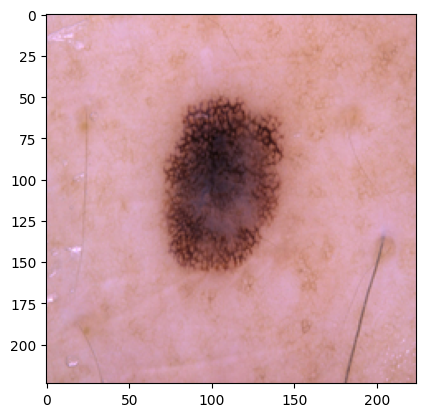

In [18]:
import matplotlib.pyplot as plt
plt.imshow(image,cmap=plt.cm.binary)
plt.show()

In [19]:
train_path=('/content/drive/MyDrive/kaggle/data/train')

In [20]:
test_path=('/content/drive/MyDrive/kaggle/data/test')

In [21]:
from tensorflow.keras.utils import image_dataset_from_directory
train_dataset = image_dataset_from_directory(train_path,label_mode='categorical',image_size=(180, 180), batch_size=32)

Found 2637 files belonging to 2 classes.


In [22]:
from tensorflow.keras.utils import image_dataset_from_directory
test_dataset = image_dataset_from_directory(test_path,label_mode='categorical',image_size=(180, 180), batch_size=32)

Found 660 files belonging to 2 classes.


In [23]:
class_names=train_dataset.class_names
class_names

['benign', 'malignant']

In [24]:
class_names=test_dataset.class_names
class_names

['benign', 'malignant']

In [30]:
model=Sequential()

In [31]:
model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(180,180,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
model.add(layers.MaxPooling2D((2,2)))

In [33]:
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(2,activation='softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 20, 20, 128)      

In [35]:
model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
 metrics=["accuracy"])

In [36]:
history=model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=15
)

Epoch 1/15
83/83 [==============================] - 21s 98ms/step - loss: 25.5140 - accuracy: 0.6052 - val_loss: 0.6934 - val_accuracy: 0.4561
Epoch 2/15
83/83 [==============================] - 10s 112ms/step - loss: 0.8015 - accuracy: 0.5245 - val_loss: 0.6928 - val_accuracy: 0.5455
Epoch 3/15
83/83 [==============================] - 13s 149ms/step - loss: 0.6921 - accuracy: 0.5461 - val_loss: 0.6915 - val_accuracy: 0.5455
Epoch 4/15
83/83 [==============================] - 8s 93ms/step - loss: 0.6911 - accuracy: 0.5461 - val_loss: 0.6908 - val_accuracy: 0.5455
Epoch 5/15
83/83 [==============================] - 9s 105ms/step - loss: 0.6905 - accuracy: 0.5461 - val_loss: 0.6902 - val_accuracy: 0.5455
Epoch 6/15
83/83 [==============================] - 9s 105ms/step - loss: 0.6900 - accuracy: 0.5461 - val_loss: 0.6899 - val_accuracy: 0.5455
Epoch 7/15
83/83 [==============================] - 9s 104ms/step - loss: 0.6897 - accuracy: 0.5461 - val_loss: 0.6895 - val_accuracy: 0.5455
Epoc

In [38]:
pre_model=Sequential()

In [39]:
pretrained_model=keras.applications.vgg16.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max'
)
for layers in pretrained_model.layers:
  layers.trainable=False
pre_model.add(pretrained_model)
pre_model.add(Flatten())
pre_model.add(Dense(64, activation='relu'))
pre_model.add(Dense(2,activation='softmax'))

58889256/58889256 [==============================] - 0s 0us/step


In [41]:
pre_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 512)               14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                32832     
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 14747650 (56.26 MB)
Trainable params: 32962 (128.76 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [42]:
pre_model.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
 metrics=["accuracy"])

In [43]:
history=pre_model.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=25
)

Epoch 1/25
83/83 [==============================] - 20s 179ms/step - loss: 1.9868 - accuracy: 0.7232 - val_loss: 0.9781 - val_accuracy: 0.7818
Epoch 2/25
83/83 [==============================] - 11s 131ms/step - loss: 0.7356 - accuracy: 0.8089 - val_loss: 0.7884 - val_accuracy: 0.7879
Epoch 3/25
83/83 [==============================] - 11s 131ms/step - loss: 0.4738 - accuracy: 0.8479 - val_loss: 0.6255 - val_accuracy: 0.8015
Epoch 4/25
83/83 [==============================] - 11s 132ms/step - loss: 0.3324 - accuracy: 0.8817 - val_loss: 0.5518 - val_accuracy: 0.8106
Epoch 5/25
83/83 [==============================] - 11s 128ms/step - loss: 0.2505 - accuracy: 0.9022 - val_loss: 0.5581 - val_accuracy: 0.7955
Epoch 6/25
83/83 [==============================] - 12s 134ms/step - loss: 0.1954 - accuracy: 0.9264 - val_loss: 0.5436 - val_accuracy: 0.8152
Epoch 7/25
83/83 [==============================] - 14s 159ms/step - loss: 0.1456 - accuracy: 0.9446 - val_loss: 0.5884 - val_accuracy: 0.8030

In [45]:
test_loss, test_acc = pre_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

21/21 [==============================] - 3s 104ms/step - loss: 1.1842 - accuracy: 0.8242
Test accuracy: 0.824


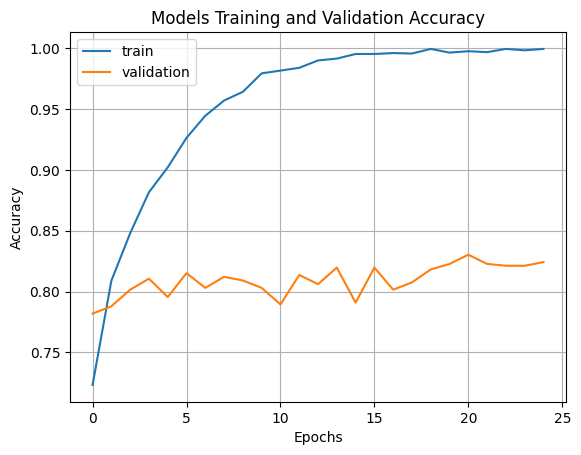

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Models Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.grid()
plt.show()

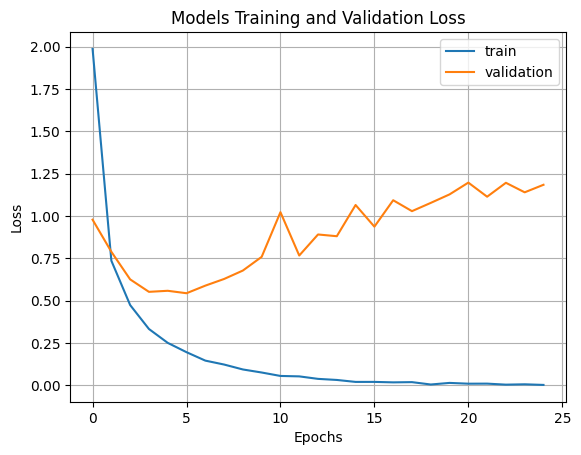

In [48]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Models Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.grid()
plt.show()

In [53]:
rmodel=Sequential()

In [54]:
res_pretrained_model=keras.applications.resnet50.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(180,180,3),
    pooling='max'
)
for layers in res_pretrained_model.layers:
  layers.trainable=False
rmodel.add(res_pretrained_model)
rmodel.add(Flatten())
rmodel.add(Dense(64, activation='relu'))
rmodel.add(Dense(2,activation='softmax'))

94765736/94765736 [==============================] - 0s 0us/step


In [55]:
rmodel.compile(loss="binary_crossentropy",
 optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
 metrics=["accuracy"])

In [56]:
history1=rmodel.fit(
    train_dataset,
    validation_data=test_dataset,
    epochs=30
)

Epoch 1/30
83/83 [==============================] - 18s 141ms/step - loss: 1.0125 - accuracy: 0.7361 - val_loss: 0.4073 - val_accuracy: 0.8167
Epoch 2/30
83/83 [==============================] - 10s 120ms/step - loss: 0.4479 - accuracy: 0.8278 - val_loss: 0.5748 - val_accuracy: 0.7545
Epoch 3/30
83/83 [==============================] - 10s 116ms/step - loss: 0.3977 - accuracy: 0.8381 - val_loss: 0.4608 - val_accuracy: 0.8030
Epoch 4/30
83/83 [==============================] - 10s 114ms/step - loss: 0.3171 - accuracy: 0.8597 - val_loss: 0.4107 - val_accuracy: 0.8530
Epoch 5/30
83/83 [==============================] - 10s 110ms/step - loss: 0.2898 - accuracy: 0.8802 - val_loss: 0.3335 - val_accuracy: 0.8364
Epoch 6/30
83/83 [==============================] - 11s 129ms/step - loss: 0.2506 - accuracy: 0.8934 - val_loss: 0.3884 - val_accuracy: 0.8545
Epoch 7/30
83/83 [==============================] - 11s 121ms/step - loss: 0.2439 - accuracy: 0.9010 - val_loss: 0.3785 - val_accuracy: 0.8561

In [57]:
test_loss, test_acc = rmodel.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

21/21 [==============================] - 3s 95ms/step - loss: 0.6420 - accuracy: 0.8712
Test accuracy: 0.871


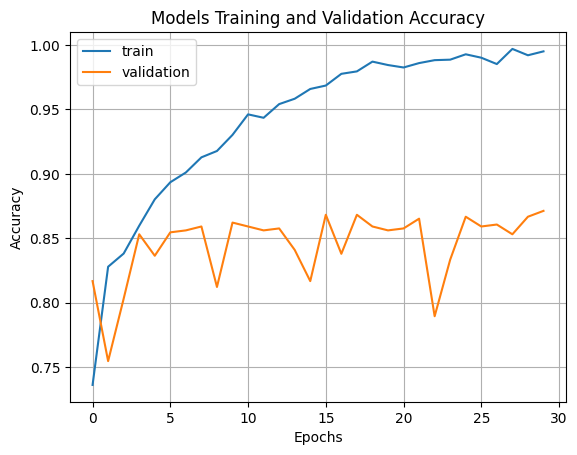

In [60]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Models Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.grid()
plt.show()

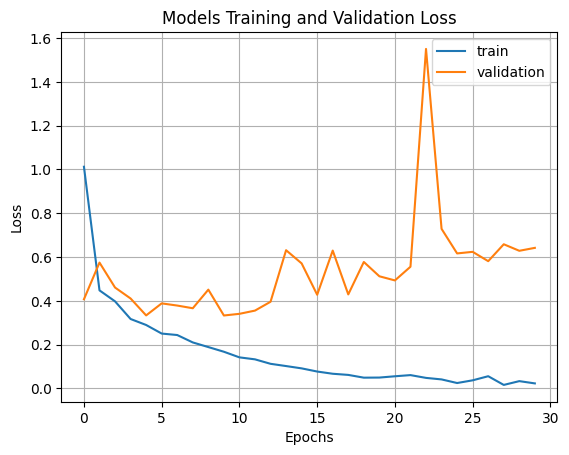

In [61]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Models Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train','validation'])
plt.grid()
plt.show()